<a href="https://colab.research.google.com/github/GalaAldebara/PCVK_IqbalMakmur/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pengenalan Citra dan Visi Komputer (Thresholding)
## Nama : Muhammad Iqbal Makmur Al-Muniri
## Kelas : TI-3H
## No Absen : 16
## NIM : 2241720099

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install pytesseract

In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

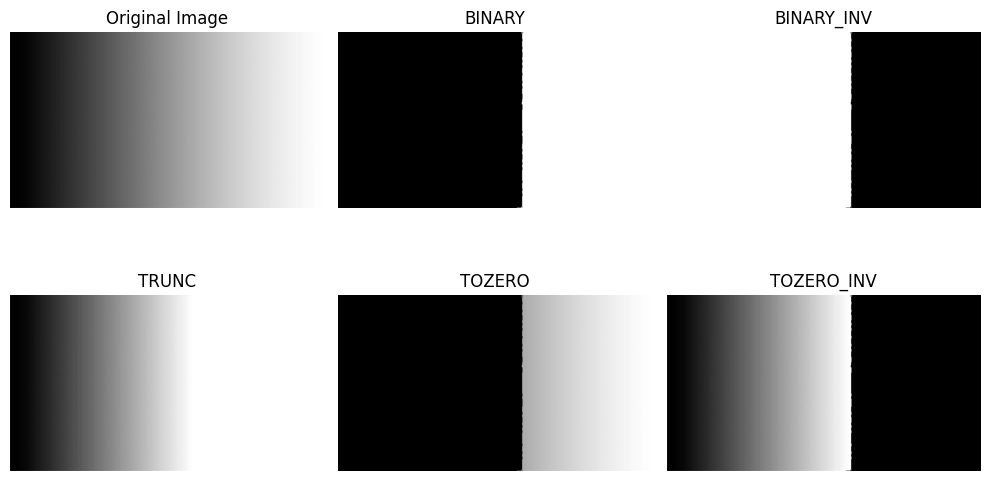

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/image_thres/gradient.jpg', cv2.IMREAD_GRAYSCALE)


threshold_value = 170

_, binary = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
_, binary_inv = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY_INV)
_, trunc = cv2.threshold(image, threshold_value, 255, cv2.THRESH_TRUNC)
_, tozero = cv2.threshold(image, threshold_value, 255, cv2.THRESH_TOZERO)
_, tozero_inv = cv2.threshold(image, threshold_value, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [image, binary, binary_inv, trunc, tozero, tozero_inv]

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


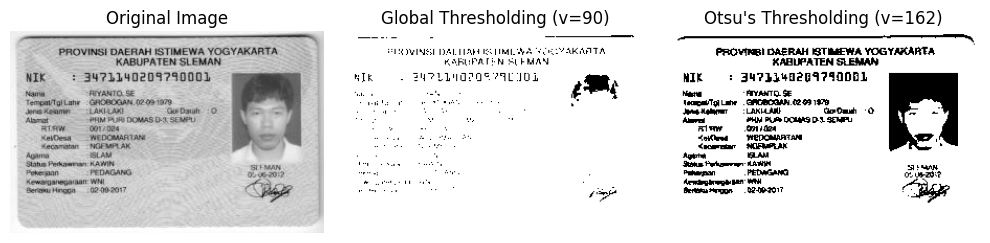

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/image_thres/ktp-riyanto.jpg', cv2.IMREAD_GRAYSCALE)

global_threshold_value = 90
_, global_thresh = cv2.threshold(image, global_threshold_value, 255, cv2.THRESH_BINARY)

histogram, _ = np.histogram(image.ravel(), bins=256, range=(0, 256))
total_pixels = image.size

probabilities = histogram / total_pixels

current_max_variance = 0
optimal_threshold = 0
sum_total = np.dot(np.arange(256), probabilities)
sum_foreground = 0
weight_background = 0
weight_foreground = 0

for threshold in range(256):
    weight_background += probabilities[threshold]
    if weight_background == 0:
        continue
    weight_foreground = 1 - weight_background
    if weight_foreground == 0:
        break

    sum_foreground += threshold * probabilities[threshold]
    mean_background = sum_foreground / weight_background
    mean_foreground = (sum_total - sum_foreground) / weight_foreground

    between_class_variance = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

    if between_class_variance > current_max_variance:
        current_max_variance = between_class_variance
        optimal_threshold = threshold

_, otsu_thresh = cv2.threshold(image, optimal_threshold, 255, cv2.THRESH_BINARY)

titles = ['Original Image', f'Global Thresholding (v={global_threshold_value})', f'Otsu\'s Thresholding (v={optimal_threshold})']
images = [image, global_thresh, otsu_thresh]

plt.figure(figsize=(10, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


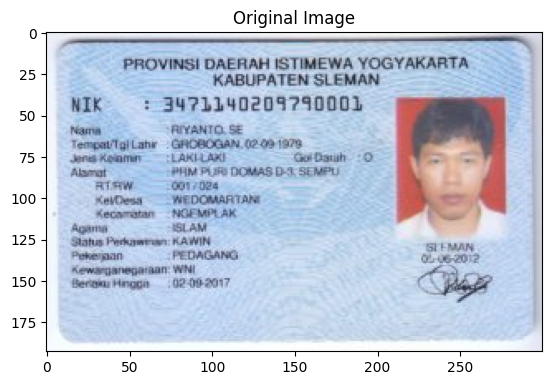

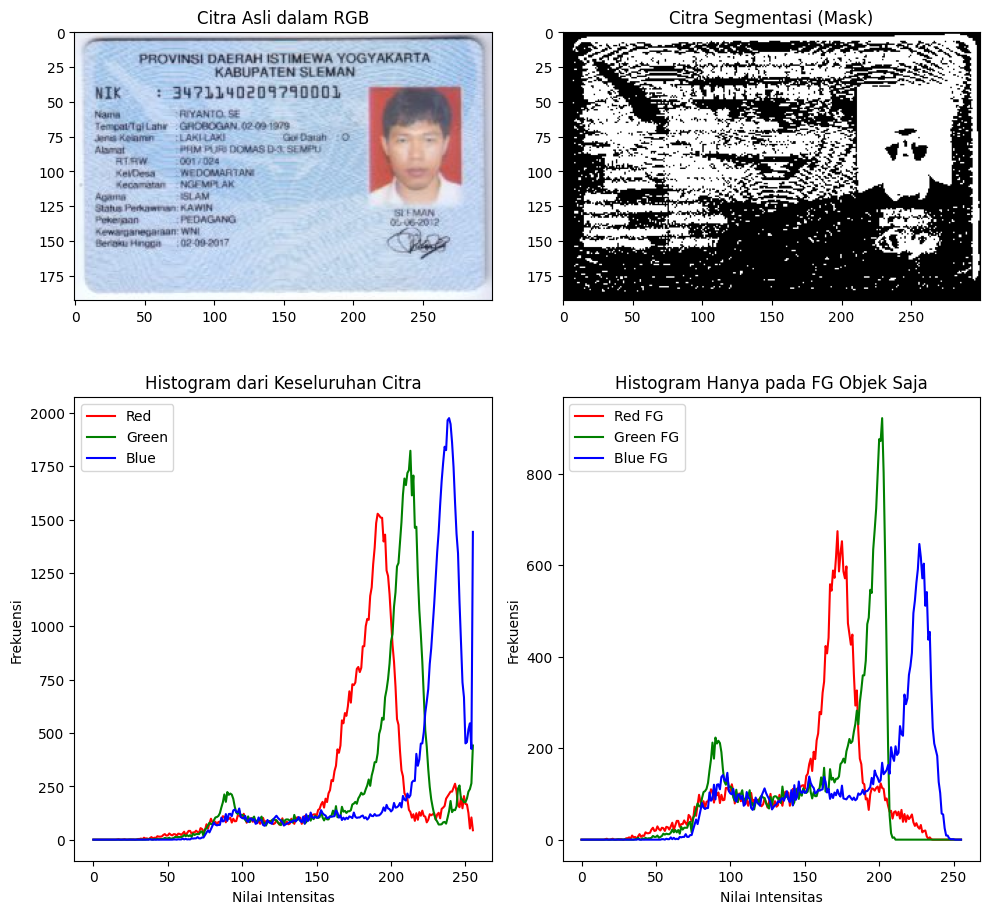

In [ ]:
import cv2 as cv

ktp_riyanto = cv.imread('/content/drive/MyDrive/image_thres/ktp-riyanto.jpg')
image_rgb = cv.cvtColor(ktp_riyanto, cv.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title('Original Image')
plt.show()

gray_image = cv.cvtColor(ktp_riyanto, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(gray_image, 200, 255, cv.THRESH_BINARY)

mask = cv.bitwise_not(mask)

hist_total_b = cv.calcHist([ktp_riyanto], [0], None, [256], [0, 256])
hist_total_g = cv.calcHist([ktp_riyanto], [1], None, [256], [0, 256])
hist_total_r = cv.calcHist([ktp_riyanto], [2], None, [256], [0, 256])

hist_fg_r = cv.calcHist([image_rgb], [0], mask, [256], [0, 256])
hist_fg_g = cv.calcHist([image_rgb], [1], mask, [256], [0, 256])
hist_fg_b = cv.calcHist([image_rgb], [2], mask, [256], [0, 256])

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Citra Asli dalam RGB')

plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segmentasi (Mask)')

plt.subplot(2, 2, 3)
plt.plot(hist_total_r, color='r', label='Red')
plt.plot(hist_total_g, color='g', label='Green')
plt.plot(hist_total_b, color='b', label='Blue')
plt.title('Histogram dari Keseluruhan Citra')
plt.xlabel('Nilai Intensitas')
plt.ylabel('Frekuensi')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(hist_fg_r, color='r', label='Red FG')
plt.plot(hist_fg_g, color='g', label='Green FG')
plt.plot(hist_fg_b, color='b', label='Blue FG')
plt.title('Histogram Hanya pada FG Objek Saja')
plt.xlabel('Nilai Intensitas')
plt.ylabel('Frekuensi')
plt.legend()

plt.tight_layout()
plt.show()

# 6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

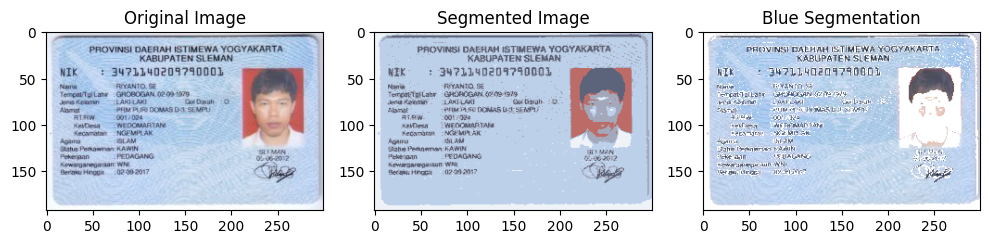

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('/content/drive/MyDrive/image_thres/ktp-riyanto.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('on')

pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

k = 5
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

hsv_image = cv.cvtColor(segmented_image.astype(np.uint8), cv.COLOR_RGB2HSV)

lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

blue_mask = cv.inRange(hsv_image, lower_blue, upper_blue)

result = cv.bitwise_and(image, image, mask=blue_mask)

background = np.full(image.shape, 255, dtype=np.uint8)
result_with_white_bg = np.where(blue_mask[:, :, np.newaxis] == 255, result, background)

plt.subplot(1, 3, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.title('Segmented Image')
plt.axis('on')

plt.subplot(1, 3, 3)
plt.imshow(result_with_white_bg)
plt.title('Blue Segmentation')
plt.axis('on')

plt.tight_layout()
plt.show()


In [5]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ind is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


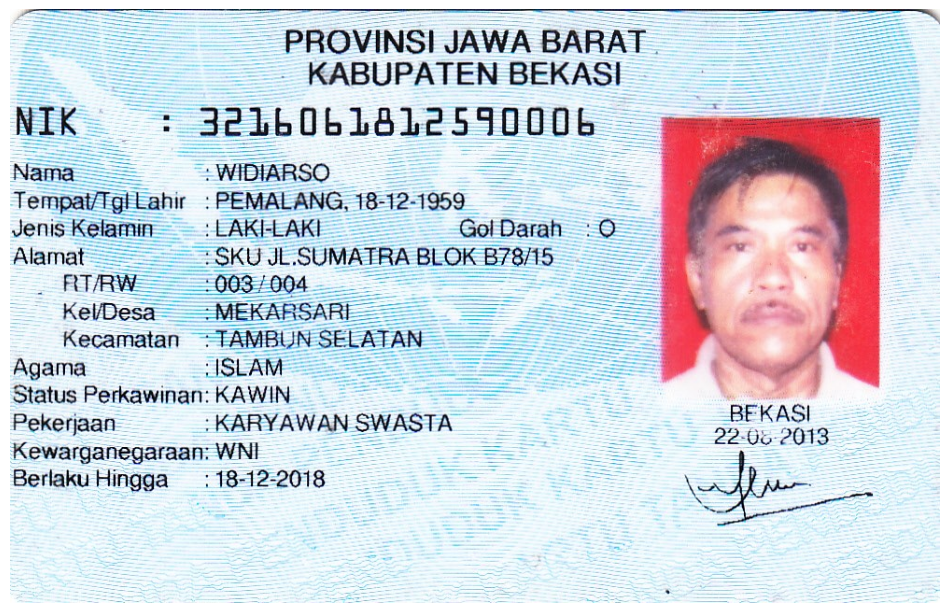

In [6]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/KTP_More/ktp6.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

threshed = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

data = pytesseract.image_to_data(threshed, output_type='data.frame')

keywords = ["NIK", "RT", "RW"]

for i, row in data.iterrows():
    if row['conf'] > 60 and any(keyword in str(row['text']) for keyword in keywords):
        (x, y, w, h) = (row['left'], row['top'], row['width'], row['height'])
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

img_with_boxes = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 10))
plt.imshow(img_with_boxes)
plt.axis('off')
plt.show()


In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)

text2 = pytesseract.image_to_string(threshed, lang="ind")

with open('/content/drive/MyDrive/KTP_More/ktp_riyanto_text.txt', 'w') as f:
    f.write(text2)

print(text2)


PROVINSI JAWA BARAT
KABUPATEN BEKASI

NIK 1 30160b1012590006 en
Nama : WIDIARSO #
Tempat/Tgl Lahir : PEMALANG, 18-12-1959
Jenis Kelamin : LAKI-LAKI Gol Darah : 0
Alamat :SKU JLLSUMATRA BLOK B78/15
RTRW 0903 004
Kel/Desa : MEKARSARI 3
Kecamatan: TAMBUN SELATAN
Agama :ISLAM
Status Perkawinan: KAWIN
Pekerjaan KARYAWAN SWASTA Aa

22-6u 2013
Kewarganegaraan: WNI tua
Berlaku Hingga :18-12-2018 N Jo

 

-———



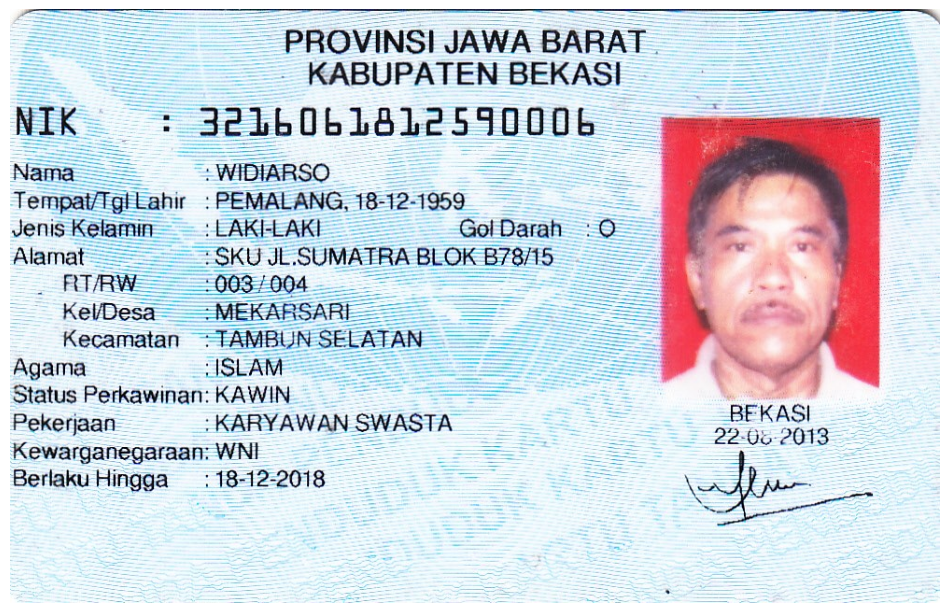

PROVINSI JAWA BARAT
KABUPATEN BEKASI

NIK 1 30160b1012590006 en
Nama : WIDIARSO #
Tempat/Tgl Lahir : PEMALANG, 18-12-1959
Jenis Kelamin : LAKI-LAKI Gol Darah : 0
Alamat :SKU JLLSUMATRA BLOK B78/15
RTRW 0903 004
Kel/Desa : MEKARSARI 3
Kecamatan: TAMBUN SELATAN
Agama :ISLAM
Status Perkawinan: KAWIN
Pekerjaan KARYAWAN SWASTA Aa

22-6u 2013
Kewarganegaraan: WNI tua
Berlaku Hingga :18-12-2018 N Jo

 

-———



In [10]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Baca gambar
img = cv2.imread('/content/drive/MyDrive/KTP_More/ktp6.png')

# Ubah ke skala abu-abu
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Terapkan threshold adaptif
threshed = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Gunakan Tesseract untuk mendeteksi teks dengan output berupa data frame
data = pytesseract.image_to_data(threshed, output_type='data.frame')

# Daftar kata kunci yang ingin dicari
keywords = ["NIK", "RT", "RW"]

# Loop melalui hasil OCR untuk mencari dan memberi kotak pada kata kunci yang ditemukan
for i, row in data.iterrows():
    if row['conf'] > 60 and any(keyword in str(row['text']) for keyword in keywords):
        (x, y, w, h) = (row['left'], row['top'], row['width'], row['height'])
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Gambar kotak pada kata kunci yang ditemukan

# Konversi ke RGB untuk ditampilkan dengan Matplotlib
img_with_boxes = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Tampilkan gambar dengan kotak deteksi
plt.figure(figsize=(12, 10))
plt.imshow(img_with_boxes)
plt.axis('off')
plt.show()

# Terapkan threshold trunc untuk meningkatkan keterbacaan teks
_, threshed_trunc = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)

# Ekstraksi teks dengan Tesseract
text2 = pytesseract.image_to_string(threshed_trunc, lang="ind")

# Simpan hasil teks ke file
with open('/content/drive/MyDrive/KTP_More/ktp_riyanto_text.txt', 'w') as f:
    f.write(text2)

# Cetak teks yang diekstraksi
print(text2)
